<a href="https://colab.research.google.com/github/DianaDoosti/Introduction_to_AI_2025/blob/main/AI4032_HW1/AI_CWRUDataset_doosti_bahmani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

file_id = "1O8dP_WS4GpgHLS9OzYo1YDKLS07Y6bbf"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, "149.mat", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1O8dP_WS4GpgHLS9OzYo1YDKLS07Y6bbf
From (redirected): https://drive.google.com/uc?id=1O8dP_WS4GpgHLS9OzYo1YDKLS07Y6bbf&confirm=t&uuid=cff195c0-791c-4e4d-9e52-4d571718f397
To: /content/149.mat
100%|██████████| 7.76M/7.76M [00:00<00:00, 42.8MB/s]


'149.mat'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

In [ ]:
# CWRU Dataset
data = loadmat("149.mat")

In [ ]:
# This function calculates the fourier transform of the input signal

def compute_fft(signal, sampling_rate):
    N = len(signal)  # Number of samples
    fft_output = np.fft.fft(signal)  # Compute FFT
    magnitude = np.abs(fft_output) / N  # Normalize magnitude
    freqs = np.fft.fftfreq(N, 1/sampling_rate)  # Frequency bins
    return (freqs[:N//2], magnitude[:N//2])


In [ ]:
#This function calcultes some statistical features of th einput signal

def compute_features(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    rms = np.sqrt(np.mean(signal**2))
    return [mean, std, rms]

In [ ]:
#Here we see the components of the entire data and extract the signals and see the number of samples in each extracted signal

print(data.keys())

drive_end_signal = data["X149_DE_time"].squeeze()  # Drive End Bearing
fan_end_signal = data["X149_FE_time"].squeeze()    # Fan End Bearing
rpm = data["X149RPM"].squeeze()  # RPM

# Print the shape of the data
print(f"Drive End Signal Shape: {drive_end_signal.shape}")
print(f"Fan End Signal Shape: {fan_end_signal.shape}")
print(f"Motor Speed (RPM): {rpm}")

dict_keys(['__header__', '__version__', '__globals__', 'X149_DE_time', 'X149_FE_time', 'X149RPM'])
Drive End Signal Shape: (485063,)
Fan End Signal Shape: (485063,)
Motor Speed (RPM): 1773


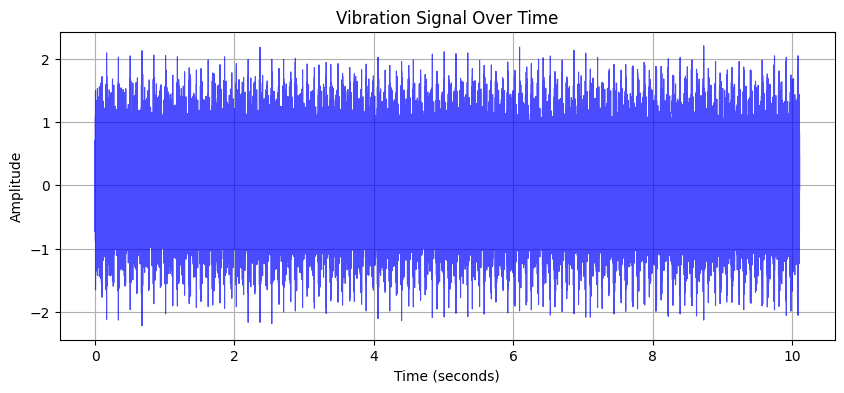

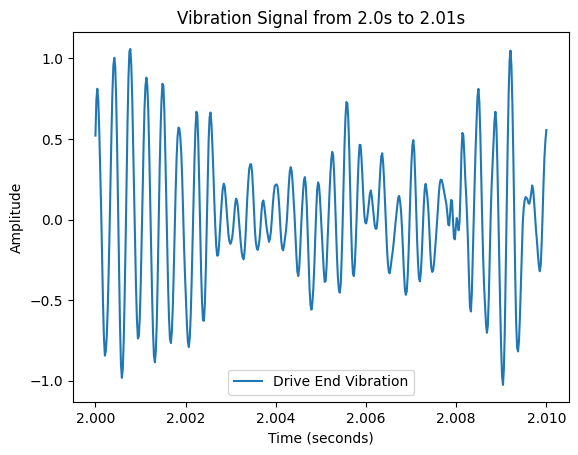

In [ ]:
# Here we take the "drive_end_signal" and plot the signal with the horizontal axis showing time

sampling_rate = 48000  # 48 kHz

# Create time axis (each sample corresponds to 1/sampling_rate seconds)
num_samples = len(drive_end_signal)  # total number of samples
time_axis = np.linspace(0, num_samples / sampling_rate, num_samples)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(time_axis, drive_end_signal, color='b', alpha=0.7, linewidth=0.8)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Vibration Signal Over Time")
plt.grid()
plt.show()

# Here we take the "drive_end_signal" and extract the samples in the specified time interval and plot the signal in that interval

start_time = 2.00  # Start at 2 seconds
end_time = 2.01    # End at 2.01 seconds

# Convert time to sample indices
start_sample = int(start_time * sampling_rate)
end_sample = int(end_time * sampling_rate)

# Extract the desired signal segment
signal_segment = drive_end_signal[start_sample:end_sample]

# Create time axis for the extracted segment
time_axis = np.linspace(start_time, end_time, len(signal_segment))


#plotting
plt.figure(1)
plt.plot(time_axis, signal_segment, label="Drive End Vibration")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Vibration Signal from {start_time}s to {end_time}s")
plt.legend()
plt.show()

In [ ]:
# Here we find the frequency spectrum of the extracted signal in the time interval and plot it in the frequency domain then find the dominent fequency

(freqs, magnitude) = compute_fft(drive_end_signal, sampling_rate)

plt.figure(2)
plt.plot(freqs, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.grid()
plt.show()

dominant_frequency_index = np.argmax(magnitude)  # Index of the max value in the magnitude array
dominant_frequency = freqs[dominant_frequency_index]  # Corresponding frequency

print(f"The dominant frequency is: {dominant_frequency} Hz")


NameError: name 'drive_end_signal' is not defined

In [ ]:
# Here we take the original signal and convert it to a 2D array with each row as 128 sample-sizes segments each with a certain overlap with the next segment
# Define segment and overlap size
segment_size = 128
overlap = 20
step_size = segment_size - overlap  # Step size for sliding window

# Compute the number of segments
num_segments = (len(drive_end_signal) - segment_size) // step_size + 1

# Create an empty array to store segments
segments = np.array([drive_end_signal[i:i + segment_size] for i in range(0, num_segments * step_size, step_size)])

# Check the shape of the resulting segments array
print("Shape of segments array:", segments.shape)  # Should be (num_segments, 128)


NameError: name 'drive_end_signal' is not defined

selected_segments Shape: (10, 128)


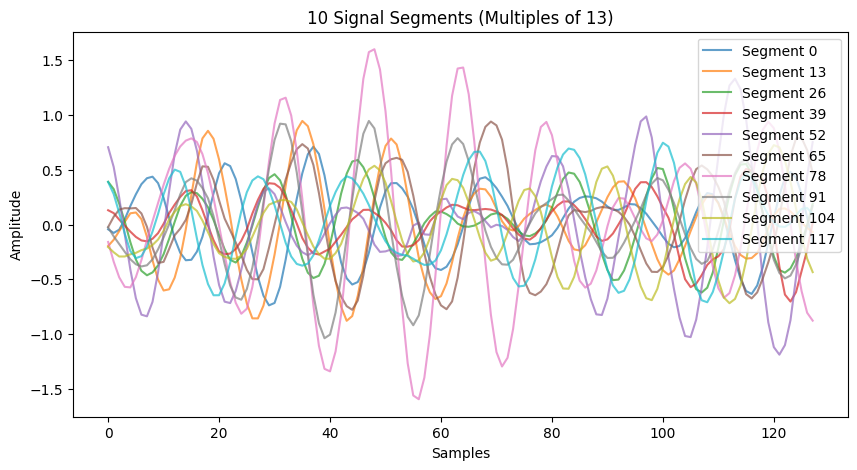

In [ ]:
# After making the 2D array into a data frame we choose the first 10 segments with thier index countable by 13 and plot them
# Convert segments to DataFrame
df_segments = pd.DataFrame(segments)

# Choose 10 segments where index is a multiple of 13
selected_segments = df_segments.iloc[::13][:10].values  # Get 10 segments

print(f"selected_segments Shape: {selected_segments.shape}")

plt.figure(figsize=(10, 5))

# Loop through selected segments and plot them
for i, segment in enumerate(selected_segments):
    plt.plot(segment, label=f"Segment {i*13}", alpha=0.7)  # Different colors & labels

# Add labels and legend
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("10 Signal Segments (Multiples of 13)")
plt.legend()
plt.show()

In [ ]:
# Here we extract the statstical feature of all the overlapping segments and store them in a csv file
features = [compute_features(segment) for segment in segments]

# Convert the `features` list into a DataFrame
df_features = pd.DataFrame(features, columns=['mean', 'std', 'rms'])

df_features.to_csv("features.csv", index=False)
files.download("features.csv")
print("Features saved to features.csv!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Features saved to features.csv!
